<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_calculus/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическое занятие 5
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [1]:
import numpy as np
import sympy
from sympy import nsolve
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

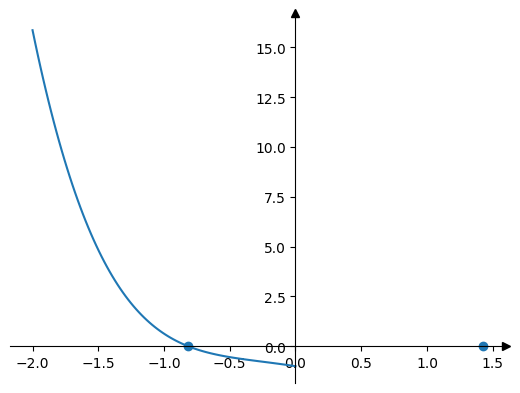

In [59]:
def f_sympy(x):
  return x**4 - sympy.exp(x)

def f(x):
  return x**4 - np.exp(x)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = sympy.symbols("x")

X = np.linspace(-2, 0, 100)
Y = f(X)

X0 = np.array(list(set([float(sympy.nsolve(f_sympy(x), x, x0)) for x0 in [-1, 1]])))
Y0 = f(X0)

ax.plot(X, Y, label="$f(x)$")
ax.scatter(X0, Y0)

### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

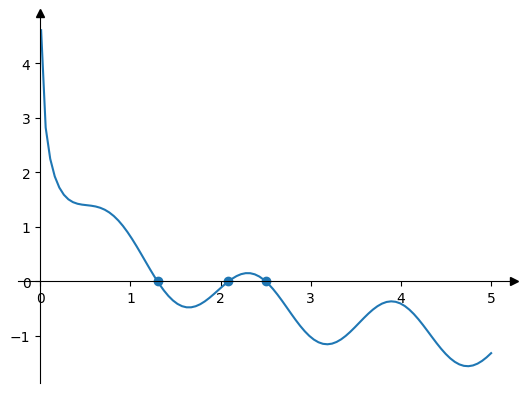

In [52]:
def f_sympy(x):
  return sympy.sin(2*x)**2 - sympy.log(x)

def f(x):
  return np.sin(2*x)**2 - np.log(x)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = sympy.symbols("x")

X = np.linspace(0.01, 5, 100)
Y = f(X)

X0 = np.array(list(set([float(sympy.nsolve(f_sympy(x), x, x0)) for x0 in [1, 2, 2.5]])))
Y0 = f(X0)

ax.plot(X, Y, label="$f(x)$")
ax.scatter(X0, Y0)

### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.


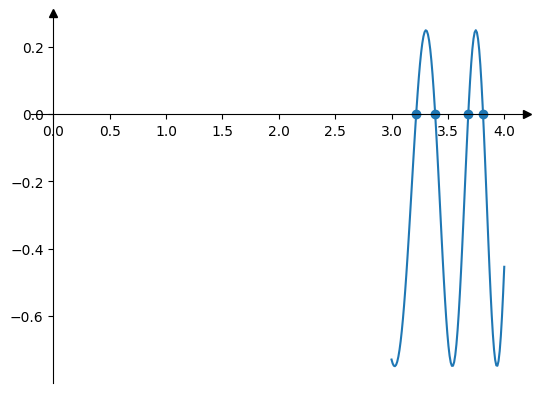

In [64]:
def f_sympy(x):
  return sympy.sin(2 * x**2 - 7 * x + 6)**2 - 3/4

def f(x):
  return np.sin(2 * x**2 - 7 * x + 6)**2 - 3/4

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = sympy.symbols("x")

X = np.linspace(3, 4, 100)
Y = f(X)

X0 = np.array(list(set([float(sympy.nsolve(f_sympy(x), x, x0)) for x0 in [3, 3.3, 3.5, 3.7]])))
Y0 = f(X0)

ax.plot(X, Y, label="$f(x)$")
ax.scatter(X0, Y0)

# Я все еще не понимаю, что за левая и правая часть
# Тут буквально все графики, где просят так сделать непрерывные
# Так что у них нет левой и правой части как у гиперболы например

### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [67]:
def f_sympy(x):
  return sympy.tan(2 * x**2 + 1)**4 - 10

x = sympy.symbols("x")

x0 = sympy.nsolve(f_sympy(x), x, [0, 0.2], solver='bisect', verify=False)
display(x0)

0.171066377483446

### Задача 5.
Решить систему уравнений
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [79]:
def f(x, y, z):
  return (x - 1)**2 + (y - 2)**2 + (z + 3)**2 - 25

def g(x, y, z):
  return x + y + z

def h(x, y, z):
  return -2 * x + 3 * y - z - 7

x, y, z = sympy.symbols("x y z")

x0, y0, z0 = sympy.nsolve((f(x, y, z), g(x, y, z), h(x, y, z)), (x, y, z), (0, 0, 0), prec=20)
display(x0, y0, z0)

assert f(x0, y0, z0) == 0
assert g(x0, y0, z0) == 0
assert h(x0, y0, z0) == 0

-2.0860669992418382052

1.2284832501895404487

0.85758374905229775653

### Индивидуальное задание
Построить графики функций $f(x)$ и $g(x)$, уточнить координаты точек пересечения, решая численно соответствующее уравнение. На  графике отметить и подписать буквами $А_1$, $A_2$, ... точки пересечения графиков.  
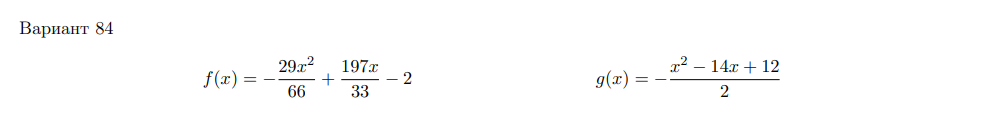

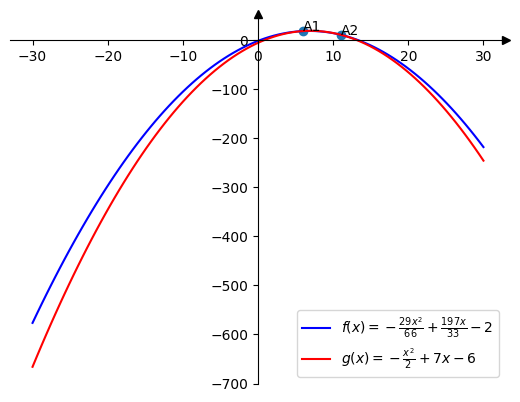

In [88]:
def f(x):
  return -(29 * x**2) / 66 + (197 * x) / 33 - 2

def g(x):
  return -(x**2 - 14 * x + 12) / 2

ax = plt.gca()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = sympy.symbols("x")

X = np.linspace(-30, 30, 100)
Y = f(X)

X0 = np.array(list(set([float(sympy.nsolve(f(x) - g(x), x, x0)) for x0 in [-10, 10]])))
X0.sort()
Y0 = f(X0)

ax.plot(X, f(X), "-", color="blue", label=f"$f(x)={sympy.latex(f(x))}$")
ax.plot(X, g(X), "-", color="red", label=f"$g(x)={sympy.latex(g(x))}$")

ax.legend(loc="best")
ax.scatter(X0, Y0)
for i in range(len(X0)):
 ax.annotate(f"A{i+1}", xy=(X0[i], Y0[i]))